<a href="https://colab.research.google.com/github/GitwithRaj/Esatate/blob/master/KNearestNeighbour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import seaborn as sns
from collections import Counter
iris=sns.load_dataset('iris')

In [ ]:
d={'setosa':0,'versicolor':1,'virginica':2}
iris['species']=iris['species'].map(d)
iris=iris.sample(frac=1)
iris

,sepal_length,sepal_width,petal_length,petal_width,species
38,4.4,3.0,1.3,0.2,0
142,5.8,2.7,5.1,1.9,2
74,6.4,2.9,4.3,1.3,1
88,5.6,3.0,4.1,1.3,1
63,6.1,2.9,4.7,1.4,1
...,...,...,...,...,...
29,4.7,3.2,1.6,0.2,0
112,6.8,3.0,5.5,2.1,2
96,5.7,2.9,4.2,1.3,1
20,5.4,3.4,1.7,0.2,0


In [ ]:
X=iris.iloc[:,0:4]
X

,sepal_length,sepal_width,petal_length,petal_width
38,4.4,3.0,1.3,0.2
142,5.8,2.7,5.1,1.9
74,6.4,2.9,4.3,1.3
88,5.6,3.0,4.1,1.3
63,6.1,2.9,4.7,1.4
...,...,...,...,...
29,4.7,3.2,1.6,0.2
112,6.8,3.0,5.5,2.1
96,5.7,2.9,4.2,1.3
20,5.4,3.4,1.7,0.2


In [ ]:
Y=iris.iloc[:,4]
Y

38     0
142    2
74     1
88     1
63     1
      ..
29     0
112    2
96     1
20     0
108    2
Name: species, Length: 150, dtype: int64

In [ ]:
X_train=np.array(X.iloc[0:120,:])
X_train

array([[4.4, 3. , 1.3, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [6.4, 2.9, 4.3, 1.3],
       [5.6, 3. , 4.1, 1.3],
       [6.1, 2.9, 4.7, 1.4],
       [4.6, 3.6, 1. , 0.2],
       [4.8, 3. , 1.4, 0.3],
       [5.5, 4.2, 1.4, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [6. , 3. , 4.8, 1.8],
       [5.4, 3.9, 1.7, 0.4],
       [7.7, 3.8, 6.7, 2.2],
       [6.8, 2.8, 4.8, 1.4],
       [6.5, 3. , 5.5, 1.8],
       [6. , 2.2, 4. , 1. ],
       [5.5, 2.5, 4. , 1.3],
       [5. , 3.4, 1.5, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [5. , 3.6, 1.4, 0.2],
       [6.3, 2.3, 4.4, 1.3],
       [6.1, 2.8, 4.7, 1.2],
       [5.8, 2.7, 5.1, 1.9],
       [6. , 3.4, 4.5, 1.6],
       [6.5, 3.2, 5.1, 2. ],
       [7.4, 2.8, 6.1, 1.9],
       [5.8, 2.8, 5.1, 2.4],
       [4.6, 3.1, 1.5, 0.2],
       [6.4, 3.1, 5.5, 1.8],
       [6.1, 3. , 4.9, 1.8],
       [5.1, 3.8, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 3. , 4.2, 1.2],
       [4.9, 3.6, 1.4, 0.1],
       [6.6, 3

In [ ]:
Y_train=np.array(Y.iloc[0:120])
Y_train

array([0, 2, 1, 1, 1, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 1, 0, 0, 0, 1, 1, 2,
       1, 2, 2, 2, 0, 2, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 0,
       2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 0, 2, 2, 0, 1, 1, 1, 2, 0,
       2, 1, 0, 0, 1, 1, 1, 2, 0, 1, 1, 0, 2, 1, 0, 1, 1, 2, 1, 0, 1, 0,
       1, 2, 0, 0, 0, 2, 2, 1, 1, 2])

In [ ]:
X_test=np.array(X.iloc[120:,:])
X_test

array([[5.6, 2.9, 3.6, 1.3],
       [6.5, 2.8, 4.6, 1.5],
       [5.4, 3. , 4.5, 1.5],
       [6.9, 3.1, 5.4, 2.1],
       [5.7, 3.8, 1.7, 0.3],
       [6.3, 2.8, 5.1, 1.5],
       [6.3, 2.5, 4.9, 1.5],
       [6.7, 3.3, 5.7, 2.1],
       [6.3, 2.9, 5.6, 1.8],
       [5.9, 3. , 5.1, 1.8],
       [5.4, 3.4, 1.5, 0.4],
       [4.4, 2.9, 1.4, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [4.9, 2.4, 3.3, 1. ],
       [7.2, 3.2, 6. , 1.8],
       [6.5, 3. , 5.8, 2.2],
       [6.7, 3.1, 5.6, 2.4],
       [7.9, 3.8, 6.4, 2. ],
       [5.1, 3.8, 1.5, 0.3],
       [6.5, 3. , 5.2, 2. ],
       [5. , 2.3, 3.3, 1. ],
       [5.2, 4.1, 1.5, 0.1],
       [7.1, 3. , 5.9, 2.1],
       [6.3, 2.7, 4.9, 1.8],
       [6.3, 2.5, 5. , 1.9],
       [4.7, 3.2, 1.6, 0.2],
       [6.8, 3. , 5.5, 2.1],
       [5.7, 2.9, 4.2, 1.3],
       [5.4, 3.4, 1.7, 0.2],
       [6.7, 2.5, 5.8, 1.8]])

In [ ]:
Y_test=np.array(Y.iloc[120:])
Y_test

array([1, 1, 1, 2, 0, 2, 1, 2, 2, 2, 0, 0, 0, 1, 2, 2, 2, 2, 0, 2, 1, 0,
       2, 2, 2, 0, 2, 1, 0, 2])

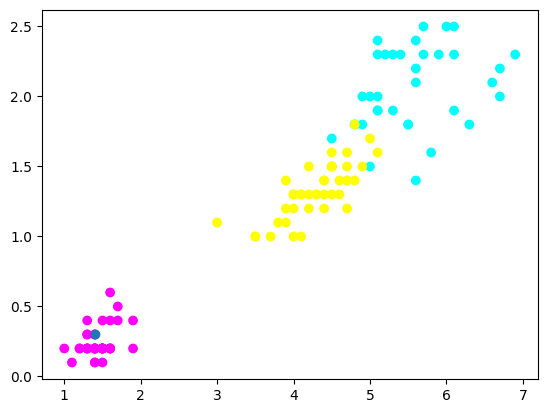

In [ ]:
cmap= ListedColormap(['#FF00FF','#FFFF00','#00FFFF'])
plt.figure()
plt.scatter(X_train[:,2],X_train[:,3], c=Y_train, cmap=cmap)
plt.scatter(X_train[6,2],X_train[6,3])
plt.show()

In [ ]:
def euclidean_distance(x1,x2):
    distance=np.sqrt(np.sum((x1-x2)**2))
    return distance

In [ ]:
def _predict(x,X_train,y_train,k):
    distances= [euclidean_distance(x, x_train) for x_train in X_train]
    print("These are x distances from all points in the training dataset")
    print(distances)
    k_indices= np.argsort(distances)[:k]
    print("These are the distances in sorted order from it's first k neighbors")
    print(k_indices)
    k_nearest_labels=[y_train[i] for i in k_indices]
    print("These are the k_nearest_neighbors")
    print(k_nearest_labels)
    most_common= Counter(k_nearest_labels).most_common()
    print("the given point is most close to " + str(most_common[0][0]))
    return most_common[0][0]
_predict(X_test[6,:],X_train,Y_train,3)

These are x distances from all points in the training dataset
[4.3023249528597916, 0.6999999999999998, 0.7549834435270755, 1.191637528781299, 0.5, 4.582575694955841, 4.023679907746143, 4.179712908801274, 3.82099463490856, 0.66332495807108, 3.770941526992961, 2.716615541441225, 0.6000000000000001, 0.8602325267042625, 1.1135528725660047, 1.2206555615733703, 3.968626966596886, 3.649657518178932, 4.1036569057366385, 0.574456264653803, 0.5099019513592785, 0.6999999999999998, 1.03440804327886, 0.9055385138137417, 1.70293863659264, 1.0908712114635712, 4.06201920231798, 0.9055385138137416, 0.6164414002968978, 3.963584236521283, 4.0877866871939394, 4.228474902373195, 1.0908712114635715, 4.168932717135166, 0.7745966692414833, 0.4242640687119282, 1.791647286716891, 1.067707825203131, 3.961060464067672, 4.036087214122114, 3.954743986657038, 0.9949874371066199, 2.0371548787463363, 0.5099019513592786, 3.945883931389772, 3.956008088970497, 4.204759208325728, 4.047221268969613, 3.9370039370059056, 4.1

2

In [ ]:
def predict(X,X_train, y_train,k):
    predictions=[_predict(x,X_train,y_train,k) for x in X]
    return predictions

In [ ]:
predictions=predict(X_test,X_train,Y_train,i)

These are x distances from all points in the training dataset
[2.9782545223670858, 2.8390139133156778, 2.9410882339705484, 3.1416556144810017, 1.2727922061357857, 1.0000000000000004, 2.8372521918222215, 1.2449899597988732, 0.6244997998398397, 0.8774964387392121, 2.835489375751565, 1.7406895185529214, 3.3075670817082456, 1.5066519173319362, 1.886796226411321, 2.8530685235374214, 0.7071067811865476, 2.6645825188948455, 3.6262928728937496, 1.0295630140987, 1.5394804318340658, 2.626785107312739, 3.2832910318764004, 1.4106735979665888, 1.8055470085267786, 2.723967694375247, 2.8337254630609507, 1.5588457268119895, 1.7999999999999998, 1.3228756555322954, 3.0822070014844876, 2.7802877548915688, 0.8774964387392122, 2.9376861643136762, 2.8460498941515415, 2.7892651361962706, 2.655183609470351, 2.9916550603303182, 1.7832554500127014, 2.959729717389748, 0.7681145747868612, 3.8923000912057133, 1.4247806848775009, 2.714774392099646, 0.9165151389911681, 2.5019992006393608, 2.8530685235374214, 0.31622

In [ ]:
print("Predictions vs Target")
for i in range(2):
  df=pd.DataFrame({
      'Predictions':predictions,
      'Target': Y_test,})
  df

Predictions vs Target


In [ ]:
acc = np.sum(predictions==Y_test)/len(Y_test)*100
print("accuracy is", acc, "%")

accuracy is 96.66666666666667 %
